#Unsupervised Machine Learning Final Project - RNA-Seq (HiSeq) PANCAN Dataset

#Introduction: 

The goal of this project is to analye RNA-Seq (HiSeq) data using clustering methods from the PANCAN dataset, which includes gene expression data from patients with various types of tumors such as Breast Invasive Carcinoma (BRCA), Kidney Renal Clear Cell Carcinoma (KIRC), Colon Adenocarcinoma (COAD), Lung Adenocarcinoma (LUAD), and Prostate Adenocarcinoma (PRAD) for understanding patterns and structures in a very high dimension dataset. This dataset in particular offers an ideal resource for analyzing molecular mechanisms for cancer, an ever-increasingly large problem. By applying unsupervised machine learning techniques to this high-dimensional data (through intiially excluding the data labels), hidden patterns and structures can be uncovered. Dimensionality reduction methods like Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE), combined with clustering algorithms such as K-means and hierarchical clustering, can reveal distinct biological states or conditions. This analysis not only provides insights into gene expression profiles but also demonstrates the potential of unsupervised learning in advancing personalized medicine and biomarker discovery. The application of these techniques to RNA-Seq data has revolutionized the understanding of cancer biology and holds promise for improving academic and real-world medical research applications.


Dataset: The Cancer Genome Atlas Pan-Cancer Analysis Project. RNA-Seq (HiSeq) PANCAN Dataset. Synapse ID: syn4301332. Available at: https://www.synapse.org/#!Synapse:syn4301332


Note: This dataset was also used for a class assginment, but a unique approach was taken in each portion of the project. Analysis, data cleaning, and model implementation was done completely from scratch. 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, decomposition, manifold, cluster, metrics, model_selection
from IPython.display import display

In [29]:
data = pd.read_csv("data.csv")
display(data.head())
print(data.info())
display(data.describe())
print("Missing values:\n", data.isnull().sum())
data = data.drop(columns=['Unnamed: 0'])


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB
None


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


Missing values:
 Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20532, dtype: int64


First visualize subsets of data (given large number of features, visualizing a subset of data is appropriate initially), and then visualize a correlation matrix for feature comparison:

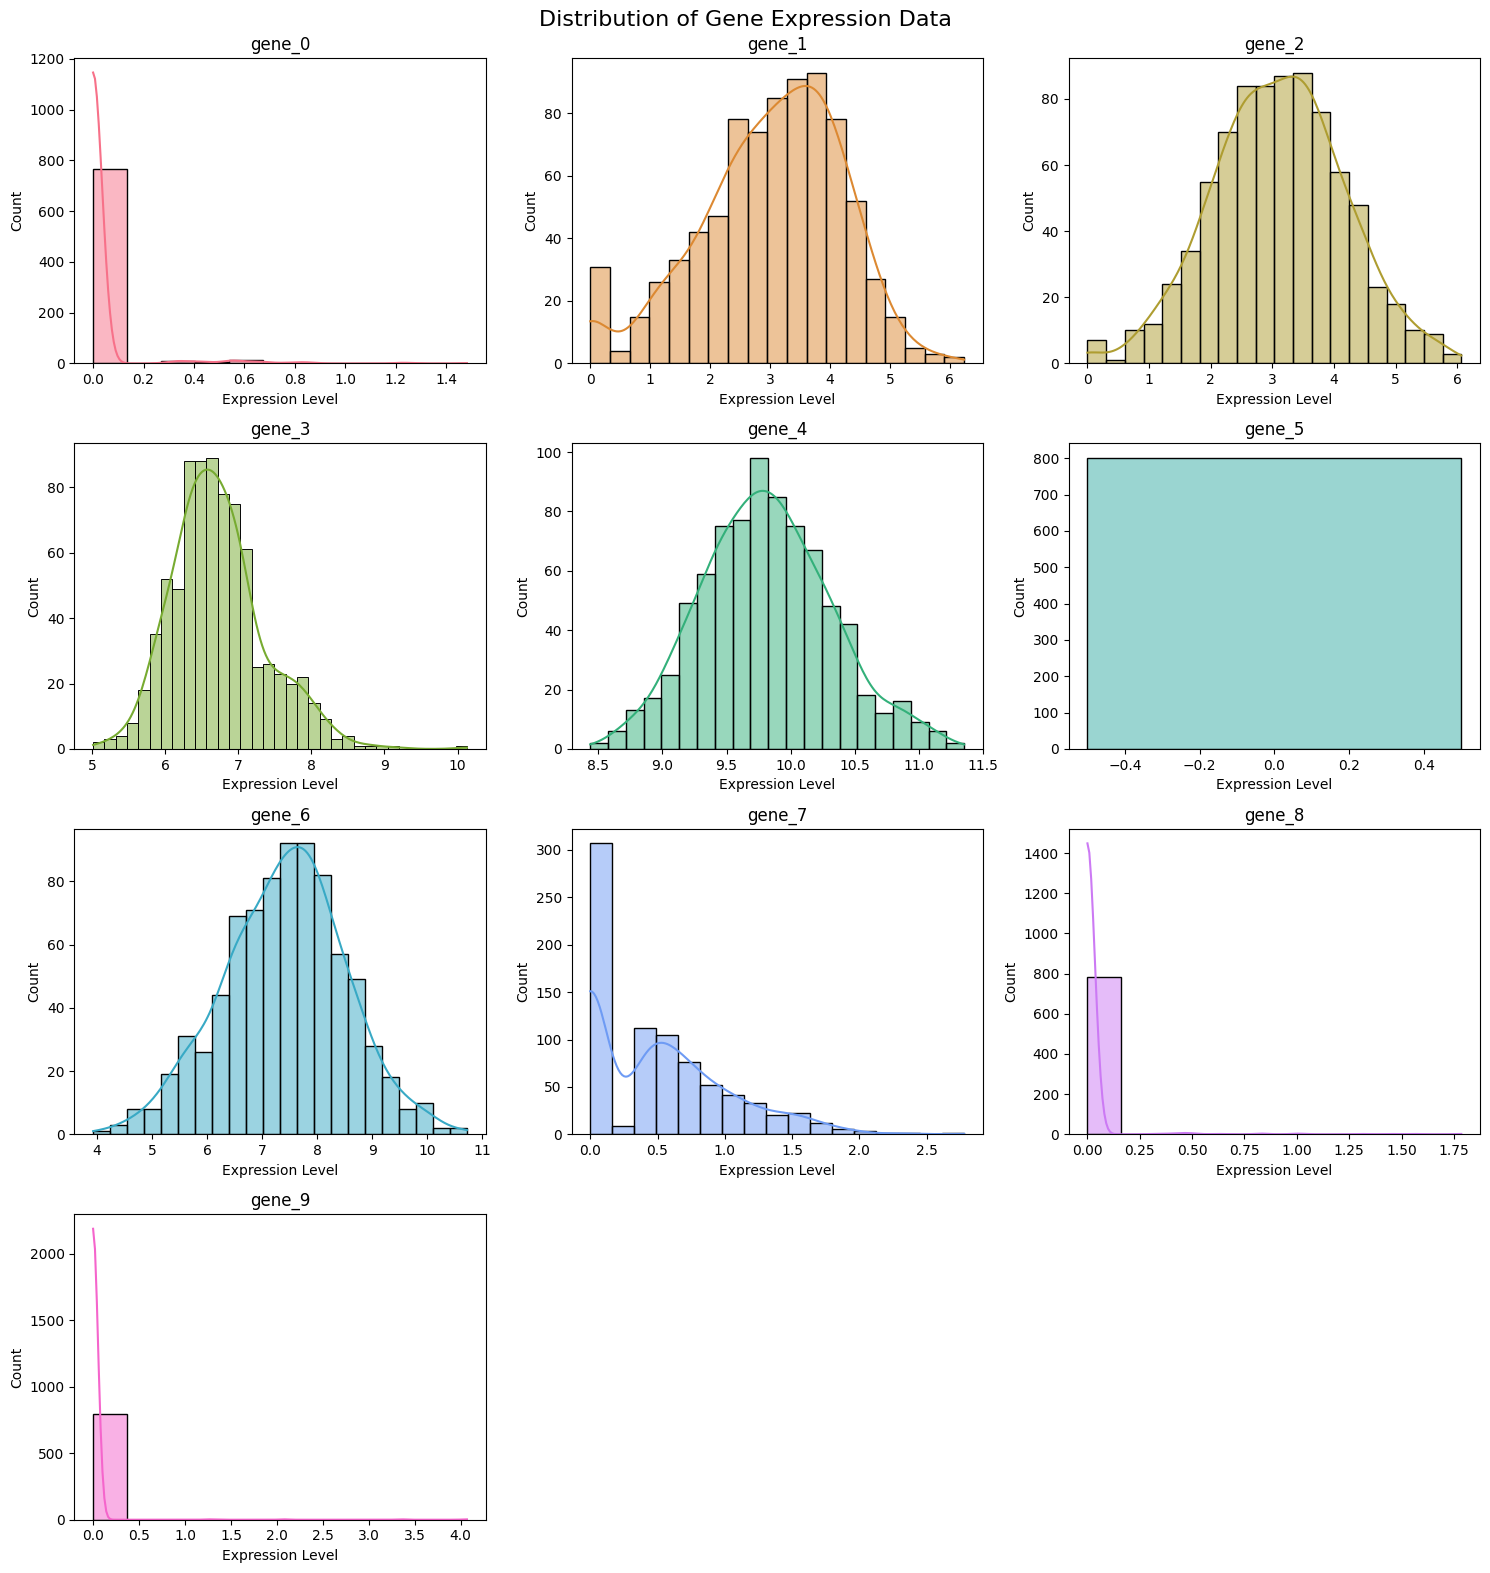

C:\Users\black\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


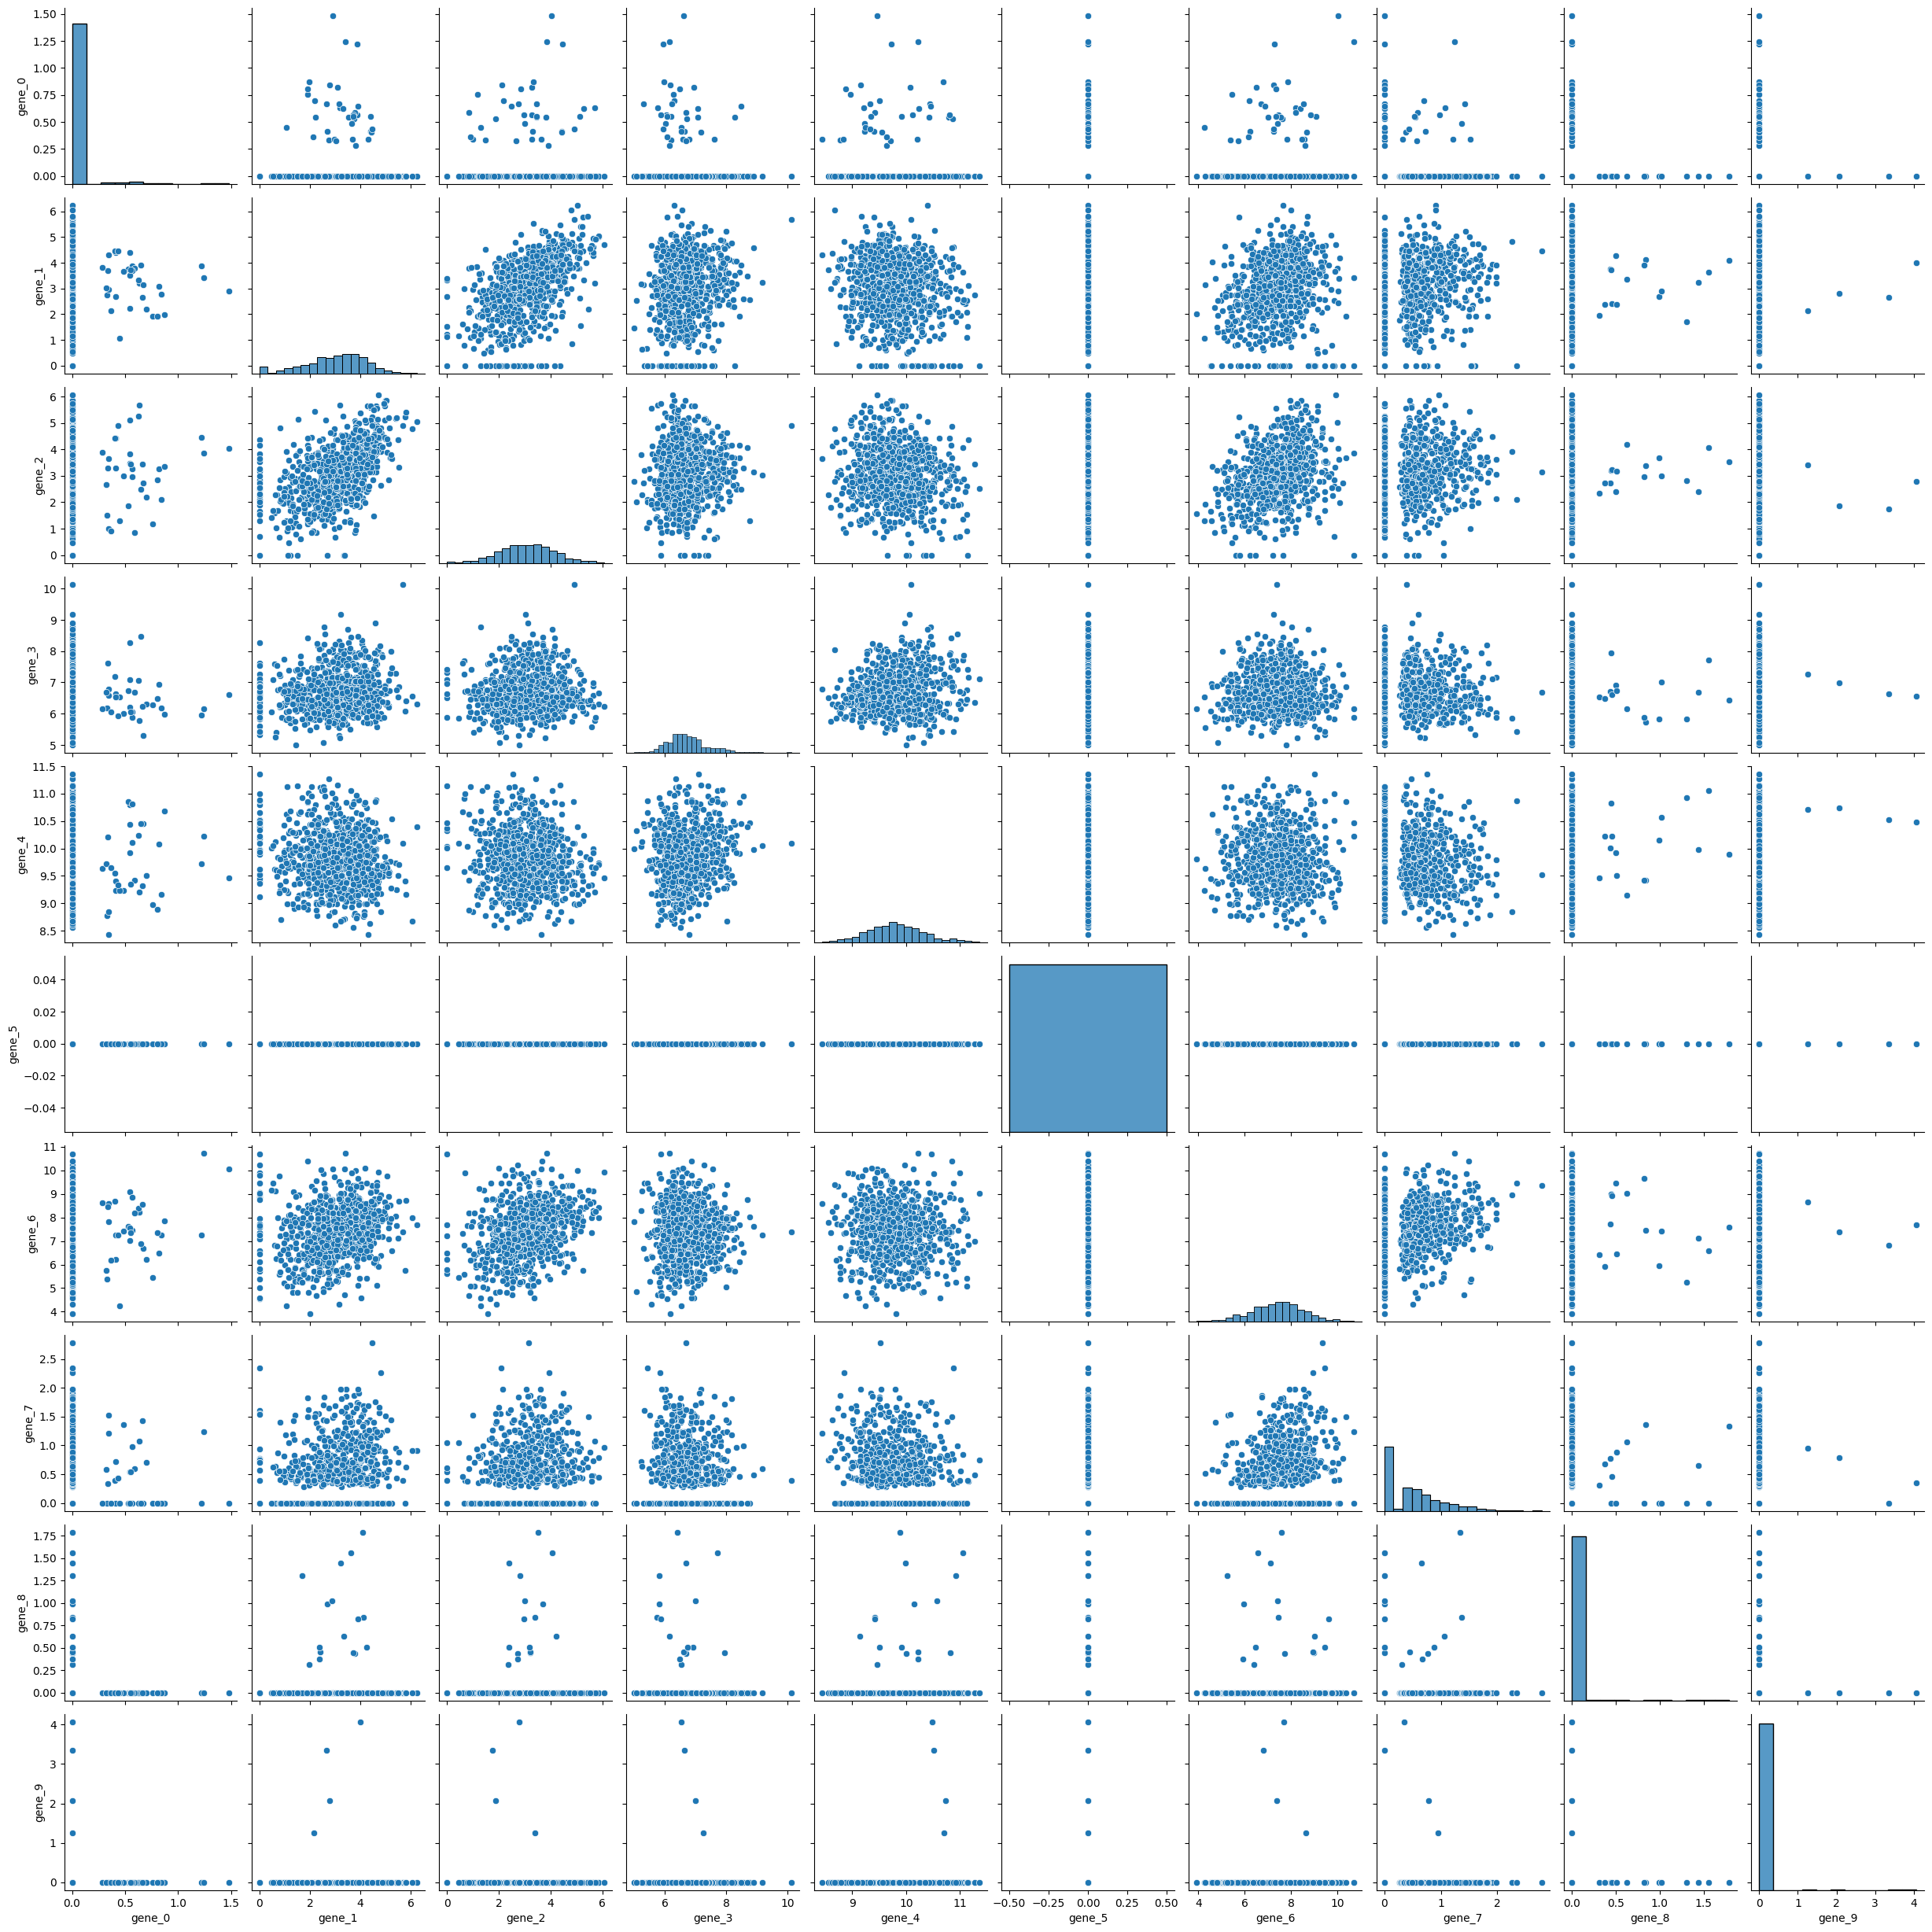

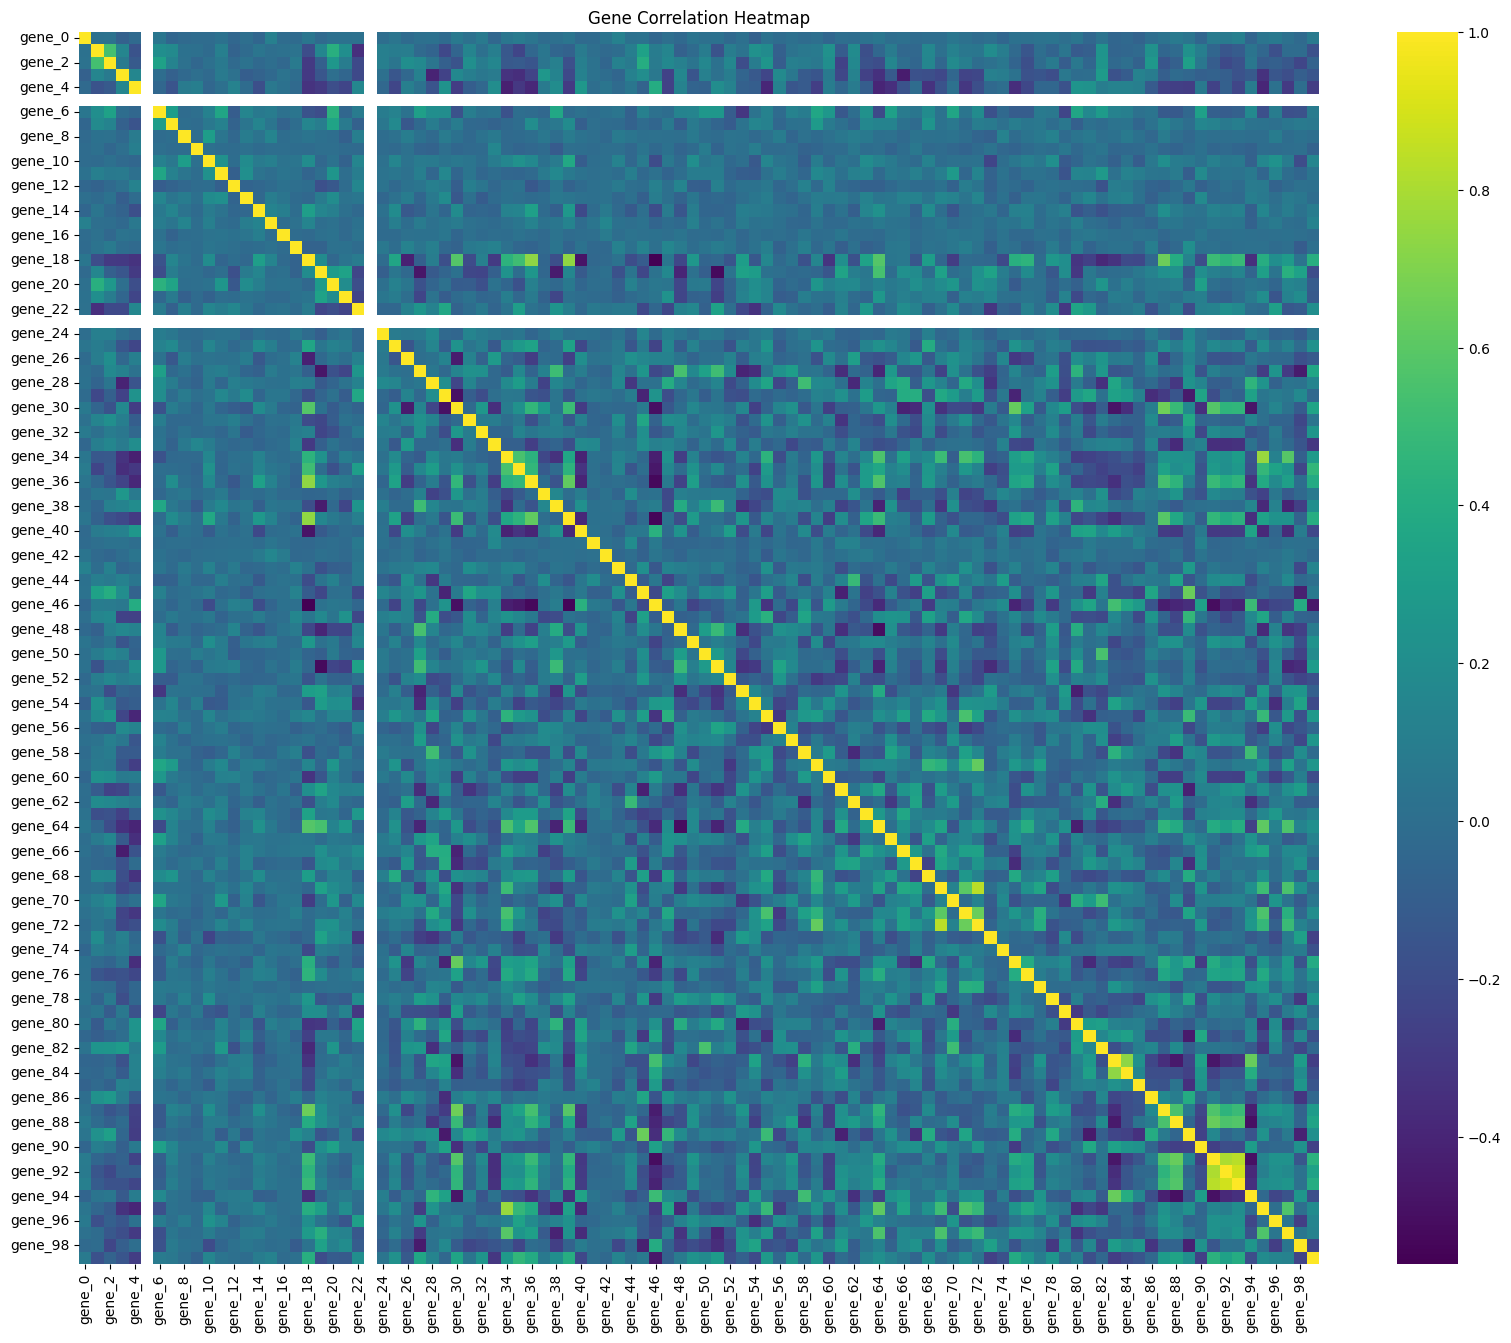

In [40]:
def plot_distribution(dataframe, columns, n_cols=3):
    n_rows = (len(columns) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    fig.suptitle('Distribution of Gene Expression Data', fontsize=16)
    palette = sns.color_palette("husl", len(columns))
    for i, col in enumerate(columns):
        ax = axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i % n_cols]
        sns.histplot(dataframe[col], kde=True, ax=ax, color=palette[i])
        ax.set_title(col)
        ax.set_xlabel('Expression Level')
    for j in range(i+1, n_rows * n_cols):
        fig.delaxes(axes[j // n_cols, j % n_cols] if n_rows > 1 else axes[j % n_cols])
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust to prevent title overlap
    plt.show()
plot_distribution(data, data.columns[:10])
sns.pairplot(data[data.columns[:10]])
plt.show()
corr_matrix = data[data.columns[:100]].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='viridis', annot=False)
plt.title('Gene Correlation Heatmap')
plt.show()

Initial Analysis: Note the interesting levels of disribution among the small subset of genes, as well as the correlation between features - with a dataset of this size (over 20000 features), dimensionality reduction, visualization and analysis are the most reasonable to move forward and draw meaningful insights. 

#Dimensionality Reduction:

Begin by scaling all data (mean = 0, SD = 1):

In [41]:
scaled_data = preprocessing.StandardScaler().fit_transform(data)
def plot_reduced_data(reduced_data, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.6)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

Principal Component Analysis (PCA):

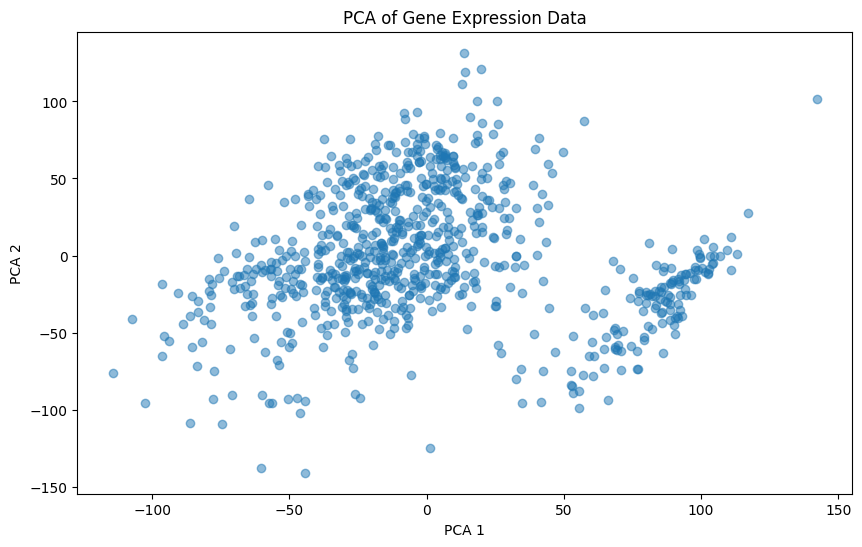

In [42]:
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Gene Expression Data')
plt.show()

Initial Analysis: Given the size of the dataset, it is reasonable to further explore and confirm the ideal number of components for dimensionality reduction via PCA. Calculating Cumulative Explained Variance for the PCA data allows for visualizaton of a 'ballpark' number of components in order to capture the most variance of the dataset.

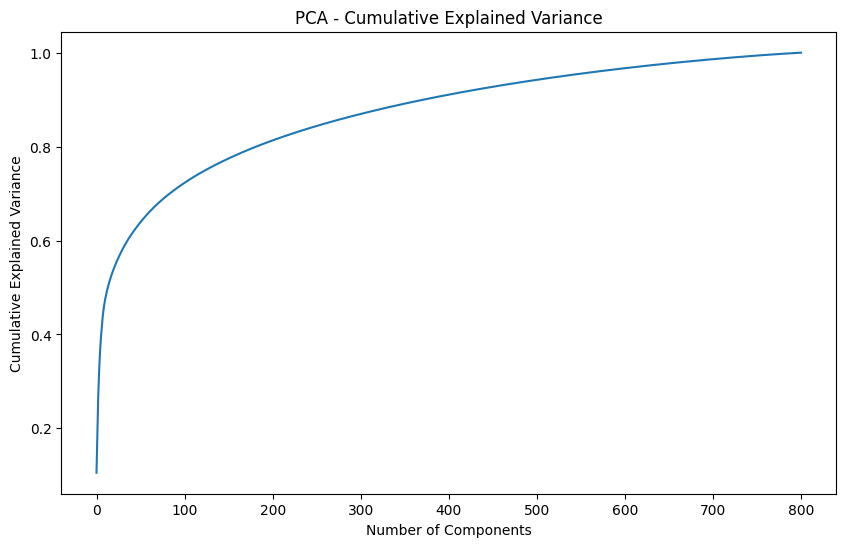

In [43]:
pca_full = decomposition.PCA().fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.show()

Updated PCA - optimal component number (captures the most variance):

In [44]:
pca = PCA(n_components=800)
X_pca = pca.fit_transform(X_scaled)

t-SNE: 

t-SNE is an optional optimization for dimensionality reduction that is non-linear, but is still helpful for high-dimensional datasets. Overall, it takes complex data with many dimensions and simplifies it into a 2D or 3D representation for simple visualization.

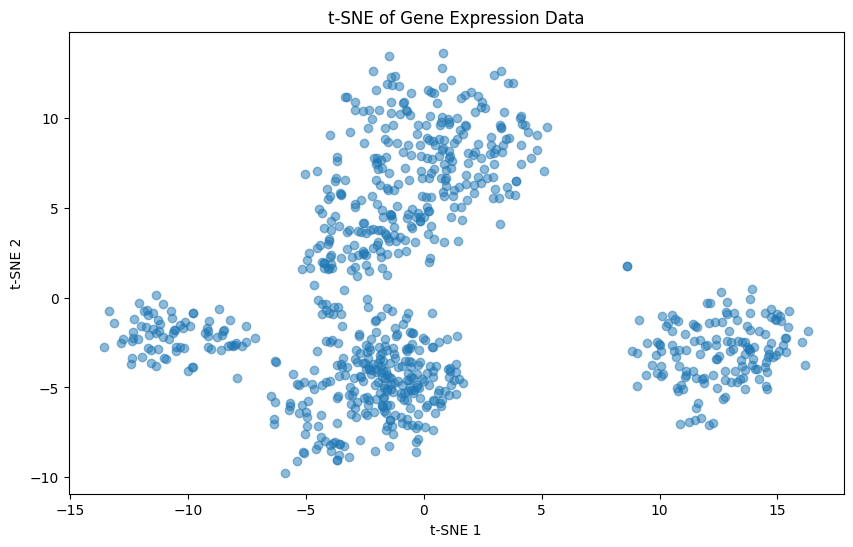

In [45]:
#small note - tSNE cannot exceed n=3 components by nature (unlike PCA) given its nonlinear nature.
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Gene Expression Data')
plt.show()

Initial Analysis: It is intersting to note the number of clusters formed (4) when given the larger concept of the dataset that still technically has labels (although not used in this unsupervised project). This also gives insight into the accuracy of the t-SNE method. 

#Unsupervised Machine Learning Model Implementation: 

#K-Means Clustering and Hierarchical/Agglomerative Clustering:

In [46]:
def perform_clustering(data, n_clusters=5):
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    hierarchical = cluster.AgglomerativeClustering(n_clusters=n_clusters)
    return kmeans.fit_predict(data), hierarchical.fit_predict(data)
kmeans_labels, hierarchical_labels = perform_clustering(X_pca)

#EVALUATE!!
true_labels = pd.read_csv("labels.csv")["Class"]
def evaluate_clustering(true_labels, predicted_labels, method_name):
    metrics_dict = {
        "Adjusted Rand Index": metrics.adjusted_rand_score,
        "Normalized Mutual Information": metrics.normalized_mutual_info_score,
        "Homogeneity": metrics.homogeneity_score,
        "Completeness": metrics.completeness_score,
        "V-measure": metrics.v_measure_score
    }
    results = {metric_name: metric_func(true_labels, predicted_labels) for metric_name, metric_func in metrics_dict.items()}
    results_df = pd.DataFrame(results, index=[method_name])
    return results_df
kmeans_results = evaluate_clustering(true_labels, kmeans_labels, "K-means")
hierarchical_results = evaluate_clustering(true_labels, hierarchical_labels, "Hierarchical")
combined_results = pd.concat([kmeans_results, hierarchical_results])
display(combined_results)

,Adjusted Rand Index,Normalized Mutual Information,Homogeneity,Completeness,V-measure
K-means,0.797192,0.852751,0.859606,0.846004,0.852751
Hierarchical,0.775359,0.833283,0.843605,0.823210,0.833283


#Discussion/Conclusion:

The analysis of gene expression data using principal component analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) reveals compelling clustering patterns, suggesting the presence of distinct biological states or conditions within the dataset. PCA visualization demonstrates several dense clusters along its first two principal components, which account for a substantial portion of the data's variance. The cumulative explained variance plot exhibits a pronounced elbow around 100 components, indicating that these components capture the most critical aspects of the data. This finding potentially allows for dimensionality reduction while preserving essential information, simplifying subsequent analyses. t-SNE visualization complements the PCA results by uncovering clusters that are less apparent in the PCA plot. This showcases t-SNE's strength in handling complex, non-linear relationships among high-dimensional data points, providing additional insights into the dataset's structure. The combination of these two techniques offers a more comprehensive view of the underlying patterns in the gene expression data.

In terms of clustering performance, both K-means and hierarchical clustering algorithms demonstrate high effectiveness in grouping the data. This is reflected in the impressive scores for metrics such as the Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI). These metrics indicate strong concordance between the clusters formed by these unsupervised methods and the true labels, suggesting that the clustering results have practical biological relevance. The similarity in performance between K-means and hierarchical methods provides flexibility in selecting an algorithm based on specific analytical requirements, such as scalability for large datasets or interpretability of results. This analysis not only supports the hypothesis that gene expression levels can be effectively clustered to uncover patterns but also underscores the potential of unsupervised learning techniques in revealing hidden structures within complex biological data. The insights gained from this approach could guide more targeted scientific inquiries, potentially leading to the development of novel therapeutic strategies. Furthermore, the robust performance of these clustering methods on gene expression data demonstrates their value as tools for exploring and understanding the intricate relationships within biological systems, spurringadvancements in personalized medicine and biomarker discovery.